In [1]:
pip install bokeh

In [20]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as re
import csv
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import csv

In [4]:
BASE_URL = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok='

KOSPI_CODE = 0
KOSDAK_CODE = 1
START_PAGE = 1

def main(code):
    res = requests.get(BASE_URL + str(code) + '&page=' + str(START_PAGE))
    page_soup = BeautifulSoup(res.text, 'lxml')
    
    total_page_num = page_soup.select_one('td.pgRR > a')
    total_page_num = int(total_page_num.get('href').split('=')[-1])
    
    result = [crawl(code,str(page)) for page in range(1,total_page_num + 1)]
    
    df = pd.concat(result, axis = 0, ignore_index = True)
    
    df.to_excel('NaverFinance.xlsx')
    
def crawl(code, page):
    res = requests.get(BASE_URL + str(code) + "&page=" + str(page))
    page_soup = BeautifulSoup(res.text, 'lxml')
    
    table_html = page_soup.select_one('div.box_type_l')
    
    header_data = [item.get_text().strip() for item in table_html.select('thead th')][1:-1]
    
    inner_data = [item.get_text().strip() for item in table_html.find_all(lambda x:
                                                                            (x.name == 'a' and
                                                                             'tltle' in x.get('class', [])) or
                                                                            (x.name == 'td' and
                                                                             'number' in x.get('class', []))
                                                                            )]
    no_data = [item.get_text().strip() for item in table_html.select('td.no')]
    number_data = np.array(inner_data)
    
    number_data.resize(len(no_data), len(header_data))
    
    df = pd.DataFrame(data = number_data, columns = header_data)
    return df

main(KOSPI_CODE)

In [2]:
data = pd.read_excel('NaverFinance.xlsx', index_col = 0)
data = data[['종목명','PER','ROE']]

In [3]:
data = data.dropna(axis = 0)
data

,종목명,PER,ROE
0,삼성전자,17.65,8.69
1,SK하이닉스,24.52,4.25
2,삼성바이오로직스,157.00,4.77
3,NAVER,75.76,10.56
4,LG화학,398.77,1.84
...,...,...,...
1185,한국주강,-1.35,-35.06
1193,에이엔피,-0.25,-9.67
1206,컨버즈,-1.13,-548.06
1217,부산주공,-0.41,-52.37


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data = data.dropna()
data['PER_rank'] = data[['PER']].rank(method = 'min')
data['ROE_rank'] = data[['ROE']].rank(method = 'min', ascending = False)


In [6]:
data['rank_sum'] = data['PER_rank'] + data['ROE_rank']

In [7]:
data1 = data.sort_values(by = 'PER_rank')
data1

,종목명,PER,ROE,PER_rank,ROE_rank,rank_sum
1026,키위미디어그룹,-0.02,-272.63,1.0,760.0,761.0
1193,에이엔피,-0.25,-9.67,2.0,657.0,659.0
1011,TBH글로벌,-0.29,-53.17,3.0,739.0,742.0
1217,부산주공,-0.41,-52.37,4.0,738.0,742.0
940,조일알미늄,-0.56,-51.10,5.0,737.0,742.0
...,...,...,...,...,...,...
122,포스코인터내셔널,9.81,7.06,759.0,232.0,991.0
131,DB하이텍,9.88,17.40,760.0,47.0,807.0
389,송원산업,9.98,8.24,761.0,187.0,948.0
217,NICE,91.04,4.39,762.0,357.0,1119.0


In [8]:
data2 = data.sort_values(by = 'ROE_rank')
data2

,종목명,PER,ROE,PER_rank,ROE_rank,rank_sum
779,세하,3.38,34.66,502.0,1.0,503.0
938,티에이치엔,-2.67,33.47,99.0,2.0,101.0
511,범양건영,10.00,32.82,256.0,3.0,259.0
380,KG케미칼,2.34,32.69,433.0,4.0,437.0
913,신풍제지,5.67,32.25,625.0,5.0,630.0
...,...,...,...,...,...,...
904,페이퍼코리아,-58.00,-136.14,195.0,759.0,954.0
1026,키위미디어그룹,-0.02,-272.63,1.0,760.0,761.0
24,SK바이오팜,-156.36,-313.66,74.0,761.0,835.0
1206,컨버즈,-1.13,-548.06,18.0,762.0,780.0


In [14]:
data_total = data.sort_values(by = 'rank_sum')
data_total.head(10)

,종목명,PER,ROE,PER_rank,ROE_rank,rank_sum
938,티에이치엔,-2.67,33.47,99.0,2.0,101.0
586,AJ네트웍스,-3.13,15.18,134.0,58.0,192.0
684,화승알앤에이,-10.55,9.62,48.0,149.0,197.0
83,호텔신라,-37.86,20.16,159.0,38.0,197.0
511,범양건영,10.00,32.82,256.0,3.0,259.0
581,비티원,"1,176.67",29.38,254.0,9.0,263.0
53,강원랜드,-224.74,9.16,115.0,155.0,270.0
606,시디즈,10.43,27.34,267.0,10.0,277.0
932,미래아이앤지,1.49,22.51,255.0,24.0,279.0
291,한일현대시멘트,10.11,21.69,261.0,26.0,287.0


In [15]:
data_total['rank_sum'] = data_total['rank_sum'].rank()

In [17]:
data_total.head(10)

,종목명,PER,ROE,PER_rank,ROE_rank,rank_sum
938,티에이치엔,-2.67,33.47,99.0,2.0,1.0
586,AJ네트웍스,-3.13,15.18,134.0,58.0,2.0
684,화승알앤에이,-10.55,9.62,48.0,149.0,3.5
83,호텔신라,-37.86,20.16,159.0,38.0,3.5
511,범양건영,10.00,32.82,256.0,3.0,5.0
581,비티원,"1,176.67",29.38,254.0,9.0,6.0
53,강원랜드,-224.74,9.16,115.0,155.0,7.0
606,시디즈,10.43,27.34,267.0,10.0,8.0
932,미래아이앤지,1.49,22.51,255.0,24.0,9.0
291,한일현대시멘트,10.11,21.69,261.0,26.0,10.0


In [25]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

KeyError: '비티원'

In [ ]:
url_tmpl = 'https://finance.naver.com/item/main.nhn?code=%s'
url = url_tmpl % ('060310') # 주식 코드 집어 넣으면 변경 가능
tables = pd.read_html(url, encoding = 'euc-kr', index_col = 0)
df = tables[3]

In [40]:
# 티에이치엔 019180
# AJ네트웍스 095570
# 화승알앤에이 013520
# 호텔신라 008770
# 범양건영 002410
# 비티원 101140
# 강원랜드 035250
# 시디즈 134790
# 미래아이앤지 007120
# 한일현대시멘트 006390
df = fdr.DataReader('101140','2010')
df = df['Close']
df

Date
2010-01-04     706
2010-01-05     729
2010-01-06     729
2010-01-07     699
2010-01-08     706
              ... 
2020-08-20    3535
2020-08-21    3535
2020-08-24    3500
2020-08-25    3530
2020-08-26    3455
Name: Close, Length: 2629, dtype: int64

In [45]:
def CalProfitRatio(df,t_s,t_e):
    res = pd.DataFrame(round(df.apply(lambda x: round(x.loc[t_e]-x.loc[t_s])*100/x.loc[t_s]),2),columns=['수익률 (%)'])    
    return res    

In [46]:
CalProfitRatio(df,'2019-04-25','2020-04-24')

AttributeError: 'int' object has no attribute 'loc'

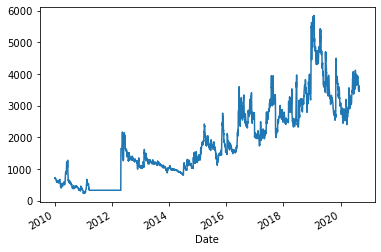

In [38]:
df.plot()
plt.show()

In [ ]:
# 티에이치엔 019180
# AJ네트웍스 095570
# 화승알앤에이 013520
# 호텔신라 008770
# 범양건영 002410
# 비티원 101140
# 강원랜드 035250
# 시디즈 134790
# 미래아이앤지 007120
# 한일현대시멘트 006390

In [24]:
tickers = {'019180':'티에이치엔',
           '095570':'AJ네트웍스',
           '013520':'화승알앤에이',
          '008770':'호텔신라',
          '002410':'범양건영',
          '101140':'비티원',
          '035250':'강원랜드',
          '134790':'시디즈',
          '007120':'미래아이앤지',
          '006390':'한일현대시멘트',
          }

In [25]:
my_folder = 'C:\\Users\EonKim\Desktop'
def get_fnguide_table(tickers):

    for code in tickers.keys():
        ''' 경로 탐색'''
        url = re.get('http://comp.fnguide.com/SVO2/ASP/SVD_main.asp?pGB=1&gicode=A%s'%(code))
        url = url.content

        html = BeautifulSoup(url,'html.parser')
        body = html.find('body')

        fn_body = body.find('div',{'class':'fng_body asp_body'})
        ur_table = fn_body.find('div',{'id':'div15'})
        table = ur_table.find('div',{'id':'highlight_D_Y'})

        tbody = table.find('tbody')


    
        tr = tbody.find_all('tr')

        Table = DataFrame()

        for i in tr:
        
            ''' 항목 가져오기'''
            category = i.find('span',{'class':'txt_acd'})
            
            if category == None:
                category = i.find('th')   
        
            category = category.text.strip()

        
            '''값 가져오기'''
            value_list =[]

            j = i.find_all('td',{'class':'r'})
            
            for value in j:
                temp = value.text.replace(',','').strip()
                    
                try:
                    temp = float(temp)
                    value_list.append(temp)
                except:
                    value_list.append(0)
            
            Table['%s'%(category)] = value_list
            
            ''' 기간 가져오기 '''    
            
            thead = table.find('thead')
            tr_2 = thead.find('tr',{'class':'td_gapcolor2'}).find_all('th')
                    
            year_list = []
            
            for i in tr_2:
                try:
                    temp_year = i.find('span',{'class':'txt_acd'}).text
                except:
                    temp_year = i.text
                
                year_list.append(temp_year)
                    
            Table.index = year_list
     
        Table = Table.T
                 
        '''CSV 파일로 저장'''
    
        Table.to_csv('%s/%s.csv'%(my_folder,tickers[code]))
                                
    return 

get_fnguide_table(tickers)

In [ ]:
tickers = {'019180':'티에이치엔',
           '095570':'AJ네트웍스',
           '013520':'화승알앤에이',
          '008770':'호텔신라',
          '002410':'범양건영',
          '101140':'비티원',
          '035250':'강원랜드',
          '134790':'시디즈',
          '007120':'미래아이앤지',
          '006390':'한일현대시멘트',
          }

In [119]:
a = pd.read_csv('C:\\Users\EonKim\Desktop\티에이치엔.csv',index_col = 0)
b = pd.read_csv('C:\\Users\EonKim\Desktop\AJ네트웍스.csv',index_col = 0)
c = pd.read_csv('C:\\Users\EonKim\Desktop\화승알앤에이.csv',index_col = 0)
d = pd.read_csv('C:\\Users\EonKim\Desktop\호텔신라.csv',index_col = 0)
e = pd.read_csv('C:\\Users\EonKim\Desktop\범양건영.csv',index_col = 0)
f = pd.read_csv('C:\\Users\EonKim\Desktop\비티원.csv',index_col = 0)
g = pd.read_csv('C:\\Users\EonKim\Desktop\강원랜드.csv',index_col = 0)
h = pd.read_csv('C:\\Users\EonKim\Desktop\시디즈.csv',index_col = 0)
i = pd.read_csv('C:\\Users\EonKim\Desktop\미래아이앤지.csv',index_col = 0)
j = pd.read_csv('C:\\Users\EonKim\Desktop\한일현대시멘트.csv',index_col = 0)

In [120]:
a = a.loc[['ROA','ROE','EPS','DPS','PER','PBR']]
a = a.iloc[:,:5].T
a

,ROA,ROE,EPS,DPS,PER,PBR
2015/12,-2.10,-4.22,-42.0,60.0,0.00,1.04
2016/12,7.65,48.83,830.0,55.0,2.69,1.12
2017/12,1.54,8.60,176.0,50.0,9.72,0.81
2018/12,2.28,12.93,280.0,50.0,8.52,1.07
2019/12,7.17,33.47,959.0,60.0,3.82,1.04


In [121]:
b = b.loc[['ROA','ROE','EPS','DPS','PER','PBR']]
b = b.iloc[:,:5].T
b

,ROA,ROE,EPS,DPS,PER,PBR
2015/12,1.83,8.87,479.0,0.0,19.69,1.68
2016/12,0.90,4.98,288.0,300.0,22.54,1.09
2017/12,0.93,5.27,320.0,86.0,21.76,1.13
2018/12,1.51,0.39,24.0,100.0,186.12,0.73
2019/12,1.92,15.18,982.0,300.0,5.06,0.73


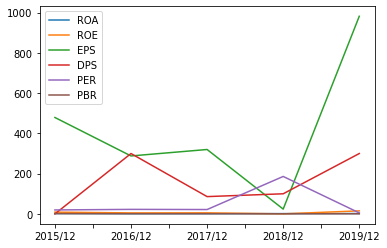

In [122]:
b.plot()
plt.show()

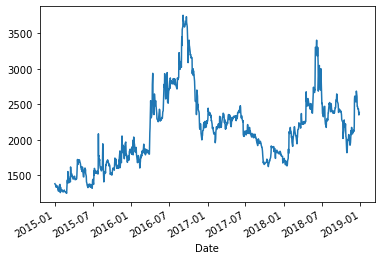

In [123]:
b1 = fdr.DataReader('019180','2015','2019')
b1 = b1['Close']
b1.plot()
plt.show()

In [124]:
c = c.loc[['ROA','ROE','EPS','DPS','PER','PBR']]
c = c.iloc[:,:5]
c

,2015/12,2016/12,2017/12,2018/12,2019/12
ROA,6.26,4.46,-3.20,-2.67,1.94
ROE,33.38,19.64,-14.23,-13.82,9.62
EPS,1191.00,902.00,-655.00,-521.00,357.00
DPS,50.00,50.00,25.00,25.00,25.00
PER,3.26,3.72,0.00,0.00,5.93
PBR,0.92,0.66,0.62,0.61,0.52


In [125]:
def CalProfitRatio(df,t_s,t_e):
    res = pd.DataFrame(round(df.apply(lambda x: round(x.loc[t_e]-x.loc[t_s])*100/x.loc[t_s]),2),columns=['수익률 (%)'])    
    return res    